In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

from tensorflow.keras import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32,32,3)
num_classes = 10

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [75]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

#data preprocess

In [9]:
train_paths = glob('/content/gdrive/My Drive/fastcampus/cifar/train/')

In [16]:
!unzip /content/gdrive/"My Drive"/fastCampus/cifar.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: cifar/train/5501_deer.png  
  inflating: cifar/train/5502_cat.png  
  inflating: cifar/train/5503_dog.png  
  inflating: cifar/train/5504_dog.png  
  inflating: cifar/train/5505_dog.png  
  inflating: cifar/train/5506_bird.png  
  inflating: cifar/train/5507_cat.png  
  inflating: cifar/train/5508_frog.png  
  inflating: cifar/train/5509_dog.png  
  inflating: cifar/train/550_cat.png  
  inflating: cifar/train/5510_dog.png  
  inflating: cifar/train/5511_truck.png  
  inflating: cifar/train/5512_automobile.png  
  inflating: cifar/train/5513_frog.png  
  inflating: cifar/train/5514_deer.png  
  inflating: cifar/train/5515_automobile.png  
  inflating: cifar/train/5516_airplane.png  
  inflating: cifar/train/5517_dog.png  
  inflating: cifar/train/5518_horse.png  
  inflating: cifar/train/5519_truck.png  
  inflating: cifar/train/551_horse.png  
  inflating: cifar/train/5520_cat.png  
  inflating: cifar/train/5521_airplane.png  
  inflati

In [17]:
!ls

cifar  gdrive  sample_data


In [19]:
train_paths = glob('cifar/train/*.png')
test_paths = glob('cifar/test/*.png')

In [20]:
path = train_paths[0]
path

'cifar/train/32446_deer.png'

In [22]:
fname = tf.strings.split(path,'_')[-1]
lbl_name = tf.strings.regex_replace(fname,'.png','')
lbl_name

<tf.Tensor: shape=(), dtype=string, numpy=b'deer'>

In [23]:
def get_class_name(path):
  fname = tf.strings.split(path,'_')[-1]
  lbl_name = tf.strings.regex_replace(fname,'.png','')
  return lbl_name

In [27]:
class_names = [get_class_name(path) for path in train_paths]
class_names

[<tf.Tensor: shape=(), dtype=string, numpy=b'deer'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'deer'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bird'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'truck'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'horse'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bird'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'truck'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,

In [34]:
classes = tf.unique(class_names).y.numpy()#y하면결과 부분이 나온다
classes

array([b'deer', b'airplane', b'bird', b'truck', b'horse', b'automobile',
       b'dog', b'frog', b'ship', b'cat'], dtype=object)

In [35]:
classes == get_class_name(path)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False, False, False, False, False, False, False, False,
       False])>

In [36]:
def onehot_encoding(label_name):
  onehot_encoding = tf.cast(classes == label_name,tf.uint8)
  return onehot_encoding

In [61]:
def read_dataset(path):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)
  #추가로 정규화

  image = tf.cast(image, tf.float32)/255

  class_name = get_class_name(path)
  label = onehot_encoding(class_name)



  return image, label

In [62]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [63]:
def image_preprocess(image,label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  return image, label

In [64]:
transformd, label = image_preprocess(image, label)

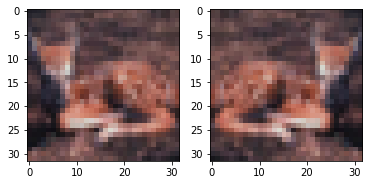

In [65]:
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(transformd)
plt.show()

In [66]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)

train_dataset = train_dataset.map(image_preprocess)#data augmentation

train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size = len(train_paths))
train_dataset = train_dataset.repeat()

In [67]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size = len(test_paths))
test_dataset = test_dataset.repeat()

#generator를 다 만들었다.

In [73]:
steps_per_epoch = len(train_paths) // batch_size #batch_size로 나눈걸 1562해야 epcoch
validation_steps = len(test_paths) // batch_size
steps_per_epoch

1562

In [74]:
model.fit_generator(
    train_dataset,
    steps_per_epoch = steps_per_epoch,
    validation_data = test_dataset,
    validation_steps = validation_steps,
    epochs = num_epochs

)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1562/1562 [==============================] - 22s 14ms/step - loss: 1.7107 - accuracy: 0.3574 - val_loss: 1.4489 - val_accuracy: 0.4583
Epoch 2/10
1562/1562 [==============================] - 50s 32ms/step - loss: 1.4311 - accuracy: 0.4761 - val_loss: 1.3412 - val_accuracy: 0.5073
Epoch 3/10
1562/1562 [==============================] - 51s 33ms/step - loss: 1.3243 - accuracy: 0.5187 - val_loss: 1.1423 - val_accuracy: 0.5851
Epoch 4/10
1562/1562 [==============================] - 50s 32ms/step - loss: 1.2529 - accuracy: 0.5475 - val_loss: 1.1441 - val_accuracy: 0.5928
Epoch 5/10
1562/1562 [==============================] - 50s 32ms/step - loss: 1.2055 - accuracy: 0.5650 - val_loss: 1.2434 - val_accuracy: 0.5501
Epoch 6/10
1562/1562 [==============================] - 50s 32ms/step - loss: 1.1695 - accuracy: 0.5835 - val_loss: 1.0472 - val_accuracy: 0.6166
Epoch 7/10
1562/1562 [==========================